#TRABALHO 1
REGINALDO GREGÓRIO DE SOUZA NETO

2252813

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

A base de dados utilizada para o estudo se trata das informações a respeito de 2 flores. Virginica e Versicolor.

In [6]:
df = pd.read_csv('iris_2class.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


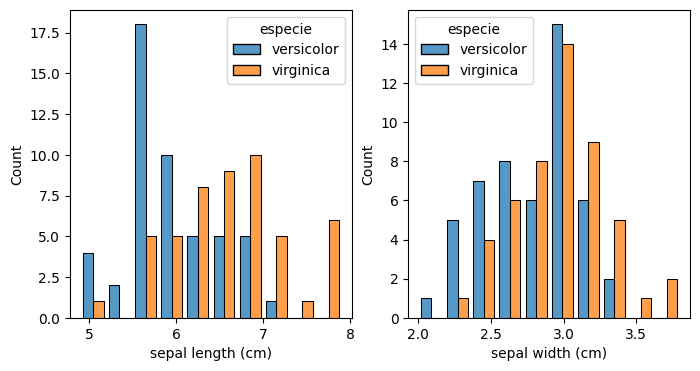

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1])
plt.show()

Analisando o gráfico das características da pétala externa (sepal), notamos que os dados são muito semelhantes e misturados em ambas as flores. Caracterizando um atributo ruim para a classificação.

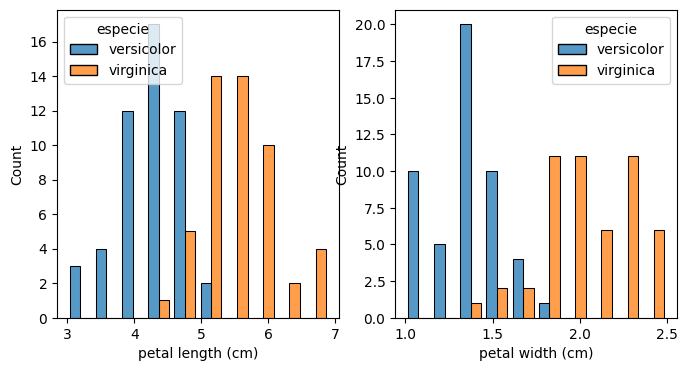

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1])
plt.show()

Em contra partida, analisando o gráfico das características da pétala interna (petal), notamos que os dados são muito distintos entre as flores. Caracterizando um atributo bom para a classificação.

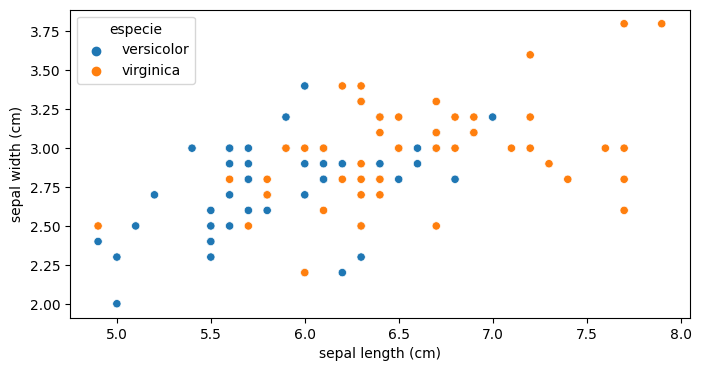

In [9]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='especie')
plt.show()

Podemos observar no gráfico de dispersão das pétalas externas que os dados são misturados e não se pode traçar um bom limiar reto para a classificação

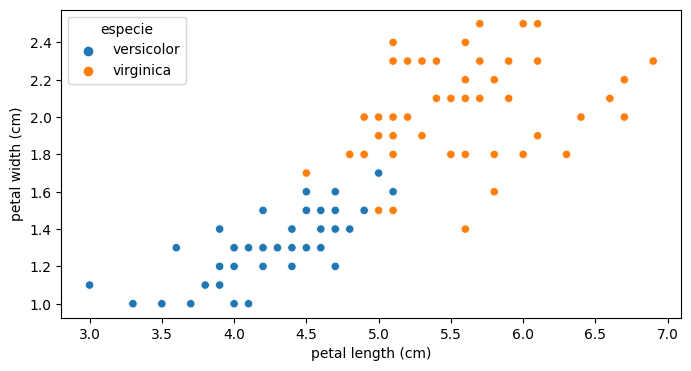

In [10]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.show()

Entretando, analisando as pétalas internas podemos notar claramente uma divisa nas caracteríticas de cada espécie de flor. Para exemplificação plotei uma linha no valor 1.65 no atributo "petal width"

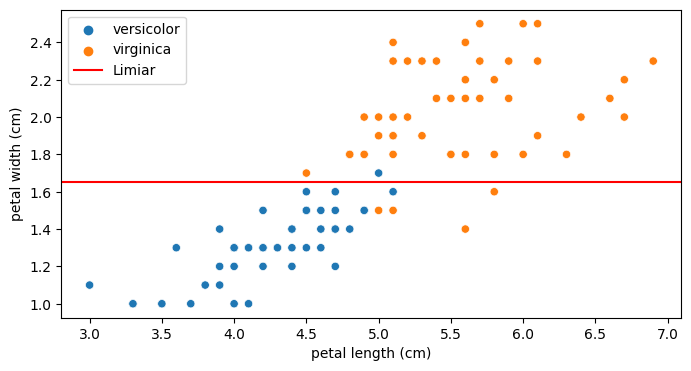

In [11]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axhline(1.65, color='red', label='Limiar')
plt.legend()
plt.show()

Criando o classificador por limiar bem simples, onde se o atributo for menor que o liminar dá a ele o rotulo 0, se não dá a ele o rótulo 1

In [12]:
def classificador_limiar(limiar, atributo, dados, rotulos=None):
    predicoes = []
    for idx in range(len(dados)):
        if dados.iloc[idx][atributo] <= limiar:
            predicoes.append(rotulos[0])
        else:
            predicoes.append(rotulos[1])
    return pd.DataFrame(predicoes, columns=['especie'])


In [13]:
from sklearn.model_selection import train_test_split

Fazendo a separação da base de dados para 80% treino e 20% teste

In [14]:
X = df[["petal length (cm)", "petal width (cm)"]]
y = df['especie']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                 test_size=0.2, stratify=y,
                 shuffle=True, random_state=10)


Analisando se a base foi separada corretamente

In [15]:
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((80, 2), (20, 2), (80,), (20,))

Encontrando o melhor limiar

In [16]:
def treinar_classificador_limiar(n_limiares, atributo, rotulos,
                                 dados_X, dados_y):

    alt_max = np.max(dados_X[atributo])
    alt_min = np.min(dados_X[atributo])
    limiares = np.linspace(alt_min, alt_max, n_limiares)

    acuracias = []
    melhor_limiar = None
    melhor_acuracia = -1

    for limiar in limiares:
        predicoes = classificador_limiar(limiar,
                                        atributo,
                                        dados_X,
                                        rotulos)

        acuracia = accuracy_score(dados_y, predicoes['especie'])

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar

        acuracias.append(acuracia)

    return melhor_limiar, melhor_acuracia, acuracias


Chamando o treinador com 100 limiares

In [24]:
limiar, acc, _ = treinar_classificador_limiar(100, 'petal width (cm)',
                                ['versicolor', 'virginica'],
                                X_treino, y_treino)

O melhor limiar encontrado foi 1.6060, com 93.75% de acertos nos treinos, bem próximo ao valor de limiar que plotei na mão apenas com base na visualização do gráfico

In [25]:
limiar, acc

(1.606060606060606, 0.9375)

Agora aplicando no conjunto de testes final,obtemos uma taxa de 95% de acertos

In [19]:
predicoes = classificador_limiar(limiar,
                     'petal width (cm)',
                     X_teste, ["versicolor", "virginica"])

accuracy_score(y_teste, predicoes['especie'])

0.95

# Estimando o desempenho do modelo usando simulação de Montecarlo

In [20]:
acuracias = []
n_iteracoes = 100

for i in range(n_iteracoes):

    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                    test_size=0.2, stratify=y,
                    shuffle=True, random_state=i)

    limiar, acc, _ = treinar_classificador_limiar(100, 'petal width (cm)',
                                ['versicolor', 'virginica'],
                                X_treino, y_treino)

    predicoes = classificador_limiar(limiar,
                     'petal width (cm)',
                     X_teste, ['versicolor', 'virginica'])

    acuracias.append(accuracy_score(y_teste, predicoes['especie']))


In [21]:
med, desv = np.mean(acuracias), np.std(acuracias)
min, max = np.min(acuracias), np.max(acuracias)

print("Acurácia Média: %.2f +- %.2f (min: %.2f, max: %.2f)" % (med, desv, min, max))

Acurácia Média: 0.92 +- 0.05 (min: 0.75, max: 1.00)
